### Importing and Reading Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Basic Checks & EDA

In [6]:
df.shape

(205, 26)

### Basic Structure info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Statistical Summary

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Handling Missing Values

In [9]:
# Check missing values
print(df.isnull().sum())

# Fill or drop missing values
#df.fillna(method='ffill', inplace=True)
# df.dropna(inplace=True)  # or drop rows if appropriate


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Unique Values in each column

In [10]:
df.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [11]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
# Extract brand from 'CarName'
df['CarBrand'] = df['CarName'].apply(lambda x: x.split()[0].lower())
df.drop(['CarName'], axis=1, inplace=True)

# Fix inconsistent brand names
df['CarBrand'] = df['CarBrand'].replace({'vw': 'volkswagen', 'vokswagen': 'volkswagen', 'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota', 'nissan': 'nissan', 'Nissan': 'nissan'})

# Drop car_ID column (not useful for modeling)
df.drop(['car_ID'], axis=1, inplace=True)

In [16]:
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


- Cleaned up brand names extracted from `CarName`.
- Removed irrelevant columns like `car_ID`.

### Data Visualization

### Distribution of Car Prices
Visualize how car prices vary across the dataset:

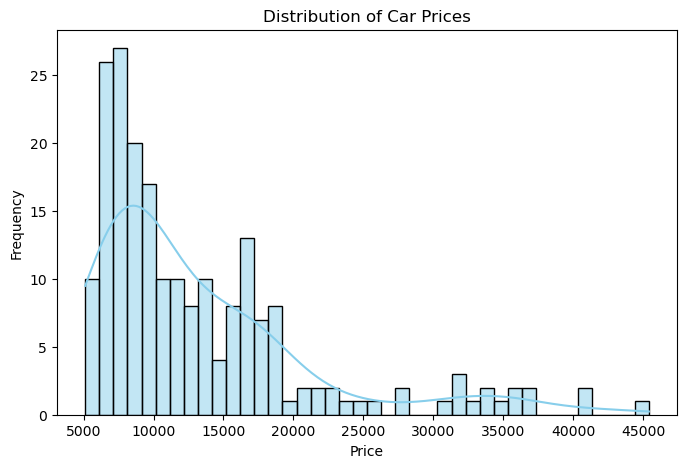

In [17]:
#Distribution of car prices using histplot.
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

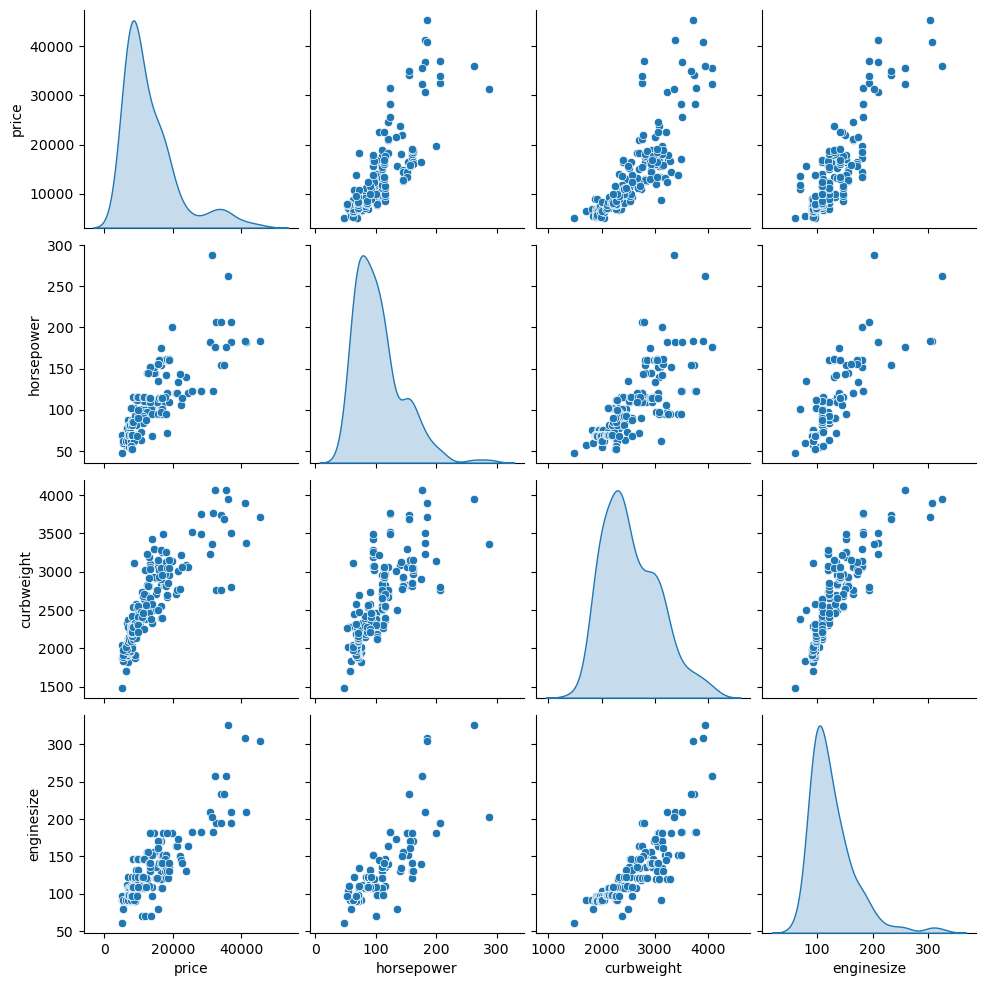

In [18]:
# Pairplot (for key numerical variables)
sns.pairplot(df[['price', 'horsepower', 'curbweight', 'enginesize']], diag_kind='kde')
plt.show()

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64


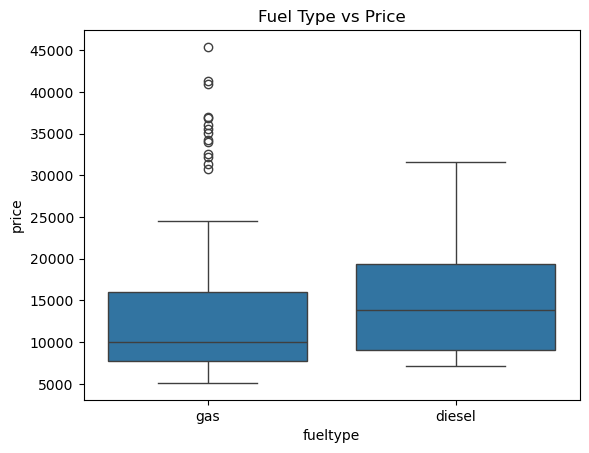

In [19]:
# Compare average price for each fuel type
print(df.groupby('fueltype')['price'].mean())

sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Fuel Type vs Price')
plt.show()

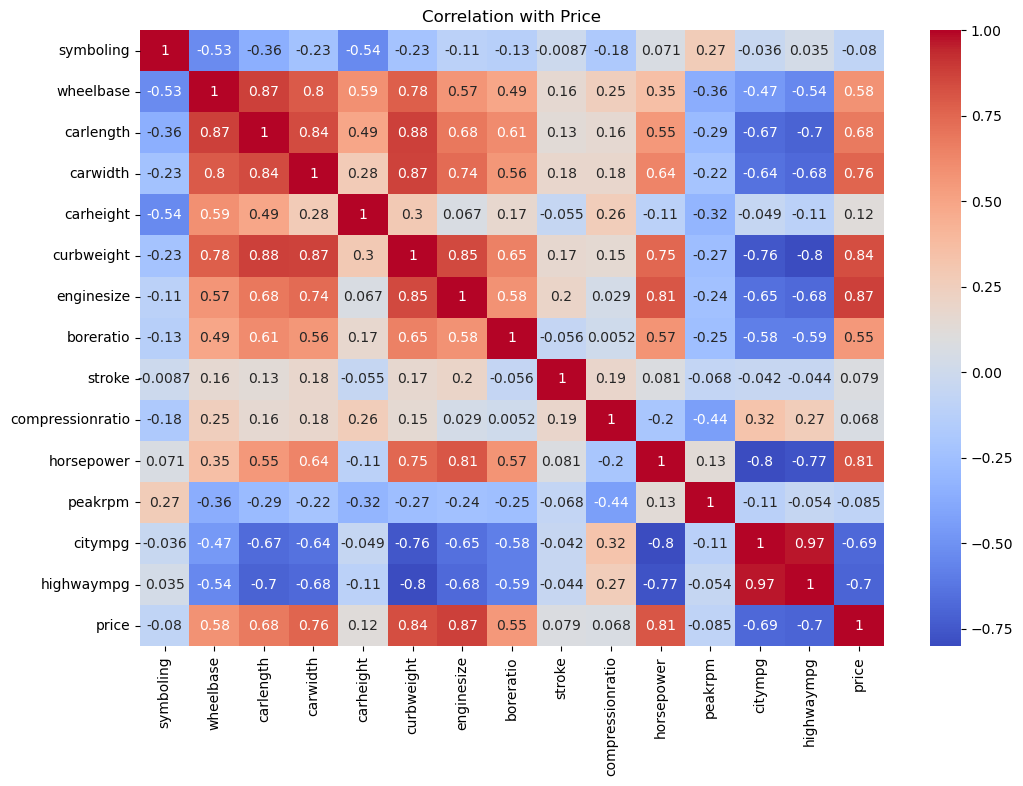

In [68]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation with Price")
plt.show()

Data Visualization
- Distribution of car prices visualized using `histplot`.
- Explored relationships with `pairplot` for key numerical features.
- Used `boxplot` to compare average prices by fuel type.
- Created heatmap of correlation matrix for numeric variables.

In [20]:
# Identify categorical features
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CarBrand'],
      dtype='object')

### Encoding Categorical Variables

In [21]:
# One-Hot Encoding (for linear models and SVR)
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,False,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,False,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,...,False,False,False,False,False,False,False,False,False,True
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,...,False,False,False,False,False,False,False,False,False,True
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,...,False,False,False,False,False,False,False,False,False,True
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,...,False,False,False,False,False,False,False,False,False,True


### Feature Engineering

In [22]:
# Features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
X_train

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,CarBrand_nissan,CarBrand_peugeot,CarBrand_plymouth,CarBrand_porsche,CarBrand_renault,CarBrand_saab,CarBrand_subaru,CarBrand_toyota,CarBrand_volkswagen,CarBrand_volvo
66,0,104.9,175.0,66.1,54.4,2700,134,3.43,3.64,22.0,...,False,False,False,False,False,False,False,False,False,False
111,0,107.9,186.7,68.4,56.7,3075,120,3.46,2.19,8.4,...,False,True,False,False,False,False,False,False,False,False
153,0,95.7,169.7,63.6,59.1,2280,92,3.05,3.03,9.0,...,False,False,False,False,False,False,False,True,False,False
96,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.29,9.4,...,True,False,False,False,False,False,False,False,False,False
38,0,96.5,167.5,65.2,53.3,2289,110,3.15,3.58,9.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,99.2,178.5,67.9,49.7,3139,181,3.43,3.27,9.0,...,True,False,False,False,False,False,False,False,False,False
14,1,103.5,189.0,66.9,55.7,3055,164,3.31,3.19,9.0,...,False,False,False,False,False,False,False,False,False,False
92,1,94.5,165.3,63.8,54.5,1938,97,3.15,3.29,9.4,...,True,False,False,False,False,False,False,False,False,False
179,3,102.9,183.5,67.7,52.0,3016,171,3.27,3.35,9.3,...,False,False,False,False,False,False,False,True,False,False


In [24]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.72738032,  1.03708546,  0.07244984, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032,  1.54123134,  1.04391556, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032, -0.50896191, -0.36761583, ...,  2.35796522,
        -0.2548236 , -0.22645541],
       ...,
       [ 0.07863571, -0.71062026, -0.73295337, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [ 1.69066776,  0.70098821,  0.77821554, ...,  2.35796522,
        -0.2548236 , -0.22645541],
       [-0.72738032,  0.28086664,  0.86954992, ..., -0.42409446,
        -0.2548236 , -0.22645541]])

In [26]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-0.72738032,  0.80181738,  1.23488746, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032,  0.12962287,  0.33814986, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032, -0.25688897, -0.06040018, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       ...,
       [-0.72738032, -0.71062026, -1.51344721, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [ 1.69066776, -0.47535218, -0.07700643, ..., -0.42409446,
        -0.2548236 , -0.22645541],
       [-0.72738032, -0.29049869, -0.05209705, ..., -0.42409446,
        -0.2548236 , -0.22645541]])

- Categorical columns identified and one-hot encoded with `drop_first=True`.
- Created `X` (features) and `y` (target).
- Scaled features using `StandardScaler`

### Model Training & Evaluation

In [27]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}
# Fit models
fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model

In [28]:
# Fit models individually
lr_model = models["Linear Regression"]
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [29]:
fitted_models["Linear Regression"].predict(X_test_scaled)

array([ 2.97643825e+04,  2.17031325e+04,  1.11611325e+04,  1.25329763e+04,
        3.00788825e+04,  6.81263250e+03,  7.66627985e+03,  7.17577985e+03,
        9.57625498e+03,  7.87187685e+03,  1.30313769e+04,  6.09277985e+03,
        1.56901325e+04,  9.77452985e+03,  4.33046325e+04,  6.45077985e+03,
       -2.74307324e+16,  1.36636325e+04,  9.02288250e+03,  9.78575498e+03,
        1.13748825e+04,  1.56221325e+04,  7.65713250e+03,  4.46013250e+03,
        7.03138250e+03,  3.04093825e+04,  1.12135299e+04,  1.58928251e+04,
        6.48063250e+03,  1.61238251e+04,  2.95458825e+04,  6.64438250e+03,
        4.95727985e+03,  1.79015751e+04,  7.81763250e+03,  2.89443825e+04,
        1.17772550e+04,  1.27406325e+04,  8.97413250e+03,  1.42356325e+04,
        8.37525498e+03])

In [30]:
dt_model = models["Decision Tree"]
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
fitted_models["Decision Tree"].predict(X_test_scaled)

array([36880. , 15998. ,  8949. , 12170. , 33900. ,  5118. ,  6918. ,
        8358. ,  8845. ,  7995. , 15250. ,  8058. , 11694. , 11248. ,
       45400. ,  6338. ,  5399. , 12764. ,  6989. ,  9233. , 10245. ,
       13499. ,  7299. ,  5389. ,  7609. , 36880. ,  8449. , 16515. ,
        7349. , 15985. , 33900. ,  6189. ,  6785. , 22018. ,  7957. ,
       33278. , 11694. , 11845. ,  8916.5, 14869. ,  8845. ])

In [32]:
rf_model = models["Random Forest"]
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [33]:
fitted_models["Random Forest"].predict(X_test_scaled)

array([35494.265     , 19237.54      ,  9004.2       , 13111.08916667,
       27381.445     ,  6480.48      ,  7822.92      ,  8068.39      ,
       10071.28      ,  8269.88      , 14771.46      ,  7931.68      ,
       14727.42833333, 10924.54333333, 39852.43      ,  6461.03      ,
        5649.07      , 14319.55666667,  8622.25333333,  9490.71666667,
       10321.25833333, 15229.56      ,  7173.49      ,  5712.06      ,
        7382.56      , 35625.565     ,  9226.76166667, 16779.66      ,
        7273.62      , 16496.55      , 27569.845     ,  6414.06      ,
        8074.89      , 18804.34      ,  8026.22      , 27220.15      ,
       11064.01166667, 12624.74      ,  7767.8       , 14553.51666667,
        8506.32666667])

In [34]:
gb_model = models["Gradient Boosting"]
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [35]:
fitted_models["Gradient Boosting"].predict(X_test_scaled)

array([36365.52994007, 18893.28901133,  8655.42265312, 13230.48477956,
       33195.82487098,  6935.39973327,  7830.00261753,  7425.2620019 ,
        9144.53382916,  8361.54531287, 14974.38199174,  7673.77674593,
       14481.81752142, 10984.05251468, 44454.68531236,  6424.68099127,
        5284.73708021, 13905.31056336,  8365.13563426,  8761.67261574,
       10156.5741083 , 15729.05713511,  6675.1750159 ,  6026.08724472,
        7004.82894599, 36300.75559133,  9765.29874648, 16900.60959966,
        7046.93931518, 16872.02490415, 32933.93270919,  6608.35470246,
        6901.7315383 , 19937.16063318,  8033.21661372, 32598.96685149,
       10250.14743223, 12622.86302788,  8217.02411708, 14724.97985828,
        7530.3590957 ])

In [36]:
svr_model = models["Support Vector Regressor"]
svr_model.fit(X_train_scaled, y_train)

SVR()

In [37]:
fitted_models["Support Vector Regressor"].predict(X_test_scaled)

array([10664.48064921, 10660.05345967, 10639.69065186, 10655.10438376,
       10660.56216629, 10635.00333367, 10647.40858178, 10636.13616672,
       10650.48801575, 10648.56334434, 10655.57770687, 10639.59044798,
       10655.46914233, 10646.70844117, 10662.71167395, 10634.03926257,
       10653.61574929, 10652.54283759, 10640.92081555, 10648.78749446,
       10641.96419541, 10660.96747626, 10644.8576258 , 10640.38017938,
       10637.14229821, 10664.42423336, 10654.56482488, 10661.05804619,
       10638.63002842, 10660.99236169, 10660.9419479 , 10639.28962264,
       10642.51737544, 10664.22767653, 10646.53940172, 10659.53350365,
       10652.40816462, 10659.87927775, 10646.09005805, 10652.68191241,
       10646.99324869])

Trained and fitted the following models:
- Linear Regression
- Decision Tree
- Random Forest
- Gradient Boosting
- Support Vector Regressor

In [38]:
results = []

for name, model in zip(
    ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"],
    [lr_model, dt_model, rf_model, gb_model, svr_model]
):
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "R² Score": r2_score(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred)
    })


results_df = pd.DataFrame(results)
results_df.sort_values(by="R² Score", ascending=False)


,Model,R² Score,MSE,MAE
2,Random Forest,9.585720e-01,3.270490e+06,1.287079e+03
3,Gradient Boosting,9.241813e-01,5.985429e+06,1.710336e+03
1,Decision Tree,9.069070e-01,7.349134e+06,1.782589e+03
4,SVR,-1.006462e-01,8.688943e+07,5.701536e+03
0,Linear Regression,-2.324726e+23,1.835232e+31,6.690423e+14



Metrics computed on test set:
- **R² Score**: Variance explained by the model.
- **MSE**: Mean squared error.
- **MAE**: Mean absolute error.

  
After evaluating the performance of all five regression models — using R², MSE, and MAE on the test dataset,

Best Performing Model: Random Forest Regressor.

Highest R² = explains the most variance in car prices.
Lowest MSE and MAE = fewer and smaller prediction errors.

That makes Random Forest Regressor the best performing model overall.


### Feature Importance

In [39]:
# Extract feature importances
importances = rf_model.feature_importances_
feature_names = X_test.columns
feature_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_df

,Feature,Importance
6,enginesize,5.441589e-01
5,curbweight,2.984485e-01
13,highwaympg,4.474339e-02
10,horsepower,3.348266e-02
3,carwidth,1.309033e-02
...,...,...
34,cylindernumber_twelve,5.159418e-06
35,cylindernumber_two,2.230084e-06
23,enginelocation_rear,1.036228e-06
42,fuelsystem_spfi,2.340769e-07


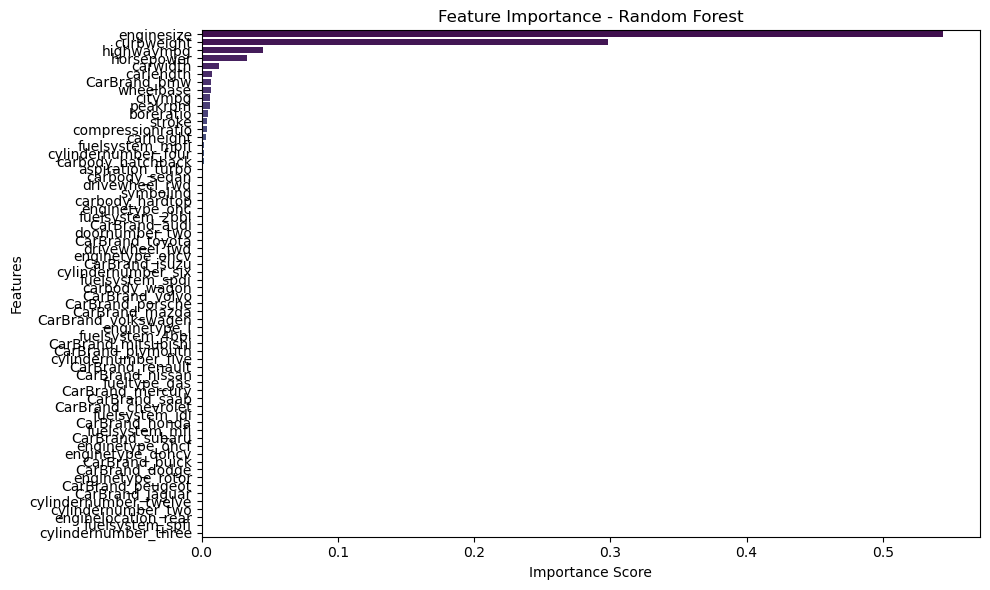

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feature_df, 
    hue='Feature',        # Add this line to use `palette` correctly
    palette='viridis', 
    legend=False          # Hide legend since y-axis already shows the features
)

plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

- Extracted feature importances from `RandomForestRegressor`.
- Visualized importance scores using Seaborn barplot.
  
- Top contributing features include:
- `enginesize`, `curbweight`, `horsepower`, and `carwidth`

In [41]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Top Features:", selected_features)


Top Features: Index(['enginelocation_rear', 'enginetype_dohcv', 'cylindernumber_six',
       'cylindernumber_twelve', 'CarBrand_audi', 'CarBrand_bmw',
       'CarBrand_buick', 'CarBrand_jaguar', 'CarBrand_porsche',
       'CarBrand_saab'],
      dtype='object')


### Grid Search for Hyperparameter Tuning

In [42]:

# Initialize model
model = RandomForestRegressor(random_state=42)

# Create a grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of trees
    'max_depth': [None, 10, 20],               # Max depth of each tree
    'min_samples_split': [2, 5, 10]            # Minimum samples required to split a node
}

#  Setup Grid Search
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,                          # 5-fold cross-validation
    scoring='r2',                  # Evaluation metric
    n_jobs=-1                      # Use all available cores
)

# Fit the Grid Search
grid_search.fit(X_train, y_train)

# View best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate performance
print("Test R2 Score:", r2_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.8889809113243816
Test R2 Score: 0.9595497871948259


### Evaluate Model Performance

In [44]:
base_model = RandomForestRegressor(random_state=42)
base_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_base = base_model.predict(X_test)
r2_base = r2_score(y_test, y_pred_base)
print("R² Score (before tuning):", r2_base)

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
r2_tuned = r2_score(y_test, y_pred_tuned)
print("R² Score (after tuning):", r2_tuned)


R² Score (before tuning): 0.9584165239875437
R² Score (after tuning): 0.9595497871948259


In [45]:
improvement = r2_tuned - r2_base
print(f"R² Improvement: {improvement:.4f}")

R² Improvement: 0.0011


Hyperparameter Tuning
- Applied GridSearchCV to optimize `RandomForestRegressor`.
- Improved R² Score after tuning.
- Compared performance before and after tuning for insight.

### Outcome:

This analysis highlights how different machine learning models perform on regression tasks and demonstrates the impact of feature selection and tuning on predictive performance.


## Business Insights
- Budget-friendly brands and engine downsizing could be leveraged for lower-cost models.
- Brand perception plays a significant role in pricing — impactful for marketing strategies.
- Understanding engine size, brand, and horsepower is critical for predicting car prices—these factors guide both product design and pricing strategy.
- This analysis delivers a predictive model for car pricing and identifies key factors that influence pricing decisions. 
- It equips manufacturers with actionable insights for product strategy and competitive pricing in the U.S. automotive market.

### Final Verdict

- The business goal of understanding car price dynamics was successfully achieved.
- The project uncovered how key features such as engine size, horsepower, and brand influence pricing.
- Ensemble models—especially Random Forest—demonstrated strong predictive power with high R² scores.
- Model performance was further enhanced using hyperparameter tuning (GridSearchCV), validating the reliability of predictions.
- Feature importance and RFE provided actionable insights that support strategic decision-making.
- The results empower management to align product design and marketing strategies with target price points across different markets.
